In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('./weather/daily_weather.csv')

In [3]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [4]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [8]:
data[data.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [9]:
del data['number']

In [11]:
before_rows = data.shape[0]
print(before_rows)

1095


In [12]:
data = data.dropna()

In [16]:
after_rows = data.shape[0]
print(after_rows)

1064


In [17]:
before_rows - after_rows

31

In [19]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1  # *1 gives a binary output instead of T or false
print(clean_data['high_humidity_label'])



0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int32


In [20]:
clean_data.shape

(1064, 11)

In [21]:
y = clean_data[['high_humidity_label']].copy()
#y

In [22]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [23]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


# Use 9am Sensor Signals as Features to Predict Humidity at 3pm

In [24]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [26]:
x = clean_data[morning_features].copy()

In [28]:
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [29]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 324) 

In [33]:
type(x_train)
type(x_test)
type(y_train)
type(y_test)
x_train.head()


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
841,918.370000,72.932000,184.500000,2.013246,186.700000,2.773806,0.0,0.0
75,920.100000,53.492000,186.100000,13.444009,193.800000,15.367778,0.0,0.0
95,927.610000,54.896000,55.000000,4.988376,53.400000,7.202947,0.0,0.0
895,919.235153,65.951112,194.343333,2.942019,216.569792,3.658810,0.0,0.0
699,919.888128,68.687822,228.517730,3.960858,247.954028,5.185547,0.0,0.0


In [34]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Fit on train set

In [36]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state= 0)
humidity_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [37]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

# Predict on Test set

In [38]:
predictions = humidity_classifier.predict(x_test)

In [40]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [41]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int32

# Measure of accuracy of the classifier

In [42]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8153409090909091

# Clustering with sci-kit learn

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import python_utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [56]:
data = pd.read_csv('./weather/minute_weather.csv')

In [57]:
data.shape

(1587257, 13)

In [58]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


# Data sampling
lots of rows, so lets sample down by taking every tenth row

In [84]:
sampled_df = data[(data['rowID']%10)==0]
sampled_df.shape

(158726, 13)

In [85]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [86]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [87]:
sampled_df[sampled_df['rain_duration']==0].shape

(157237, 13)

In [88]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [89]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [90]:
rows_before - rows_after

46

In [92]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

# Select features of interest for clustering

In [93]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [96]:
select_df = sampled_df[features]

In [97]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [98]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


Scale the features using standard scaler

In [99]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

# Use Kmeans clustering

In [100]:
kmeans = KMeans(n_clusters = 12)
model = kmeans.fit(X)
print('model\n', model)



model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


# What are the centers of 12 clusters formed

In [101]:
centers = model.cluster_centers_
centers

array([[ 0.1357504 ,  0.83410414,  1.41348823, -0.6389739 ,  1.6779583 ,
        -0.59003105, -0.71383815],
       [-0.83534731, -1.20437275,  0.37674511,  0.37009858,  0.47500777,
         0.35791559,  1.36568829],
       [ 0.23422959,  0.32038874,  1.88815273, -0.65179307, -1.55172536,
        -0.57665647, -0.28363417],
       [ 0.06377562, -0.79120078, -1.19874665, -0.57037257, -1.04483606,
        -0.5849486 ,  0.88016802],
       [ 1.36790158, -0.08166458, -1.2053249 , -0.05330448, -1.07385743,
        -0.03316255, -0.97765202],
       [ 0.68659694,  0.48124735,  0.28214586, -0.53915346,  0.46862922,
        -0.5454471 , -0.76318706],
       [-1.18311265, -0.8701715 ,  0.44682583,  1.98317253,  0.53832496,
         1.94419331,  0.90861947],
       [-0.16375346,  0.86324046, -1.31176573, -0.58947846, -1.16780374,
        -0.60478546, -0.6410683 ],
       [-0.72524274,  0.51137493,  0.17200057, -0.58224383,  0.34137556,
        -0.5955745 , -0.08747087],
       [ 1.19040416, -0.2545

Plots
lets first create  some utility functions which will help us in plotting graphs:

In [102]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [103]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [104]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.135750,0.834104,1.413488,-0.638974,1.677958,-0.590031,-0.713838,0
1,-0.835347,-1.204373,0.376745,0.370099,0.475008,0.357916,1.365688,1
2,0.234230,0.320389,1.888153,-0.651793,-1.551725,-0.576656,-0.283634,2
3,0.063776,-0.791201,-1.198747,-0.570373,-1.044836,-0.584949,0.880168,3
4,1.367902,-0.081665,-1.205325,-0.053304,-1.073857,-0.033163,-0.977652,4
5,0.686597,0.481247,0.282146,-0.539153,0.468629,-0.545447,-0.763187,5
6,-1.183113,-0.870172,0.446826,1.983173,0.538325,1.944193,0.908619,6
7,-0.163753,0.863240,-1.311766,-0.589478,-1.167804,-0.604785,-0.641068,7
8,-0.725243,0.511375,0.172001,-0.582244,0.341376,-0.595575,-0.087471,8
9,1.190404,-0.254503,-1.154901,2.121060,-1.053365,2.237763,-1.134652,9


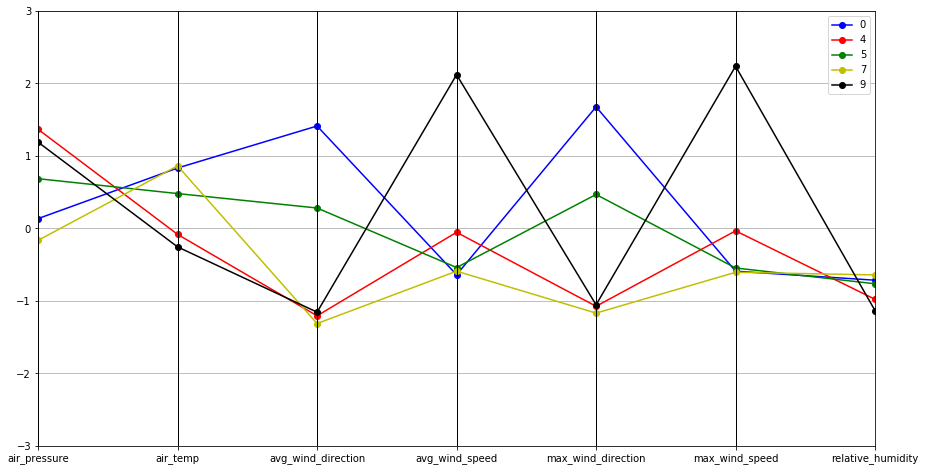

In [105]:
parallel_plot(P[P['relative_humidity'] < -0.5])   #dry days

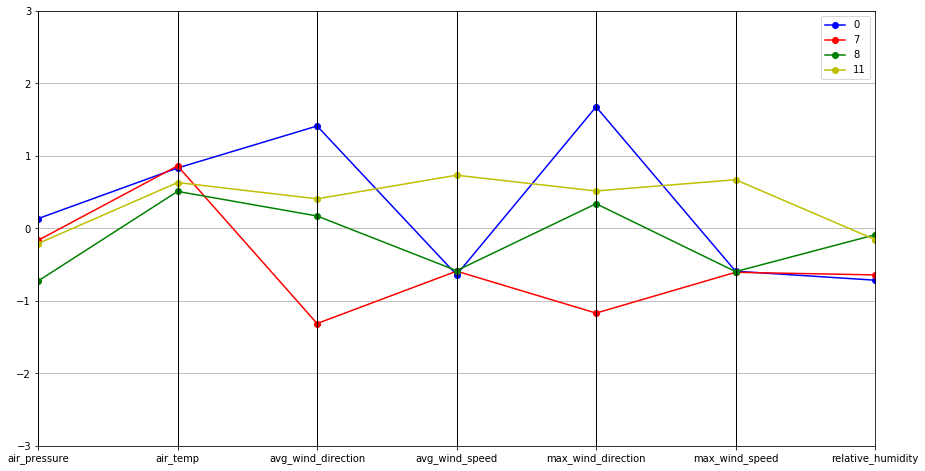

In [106]:
parallel_plot(P[P['air_temp'] > 0.5])   #warm days

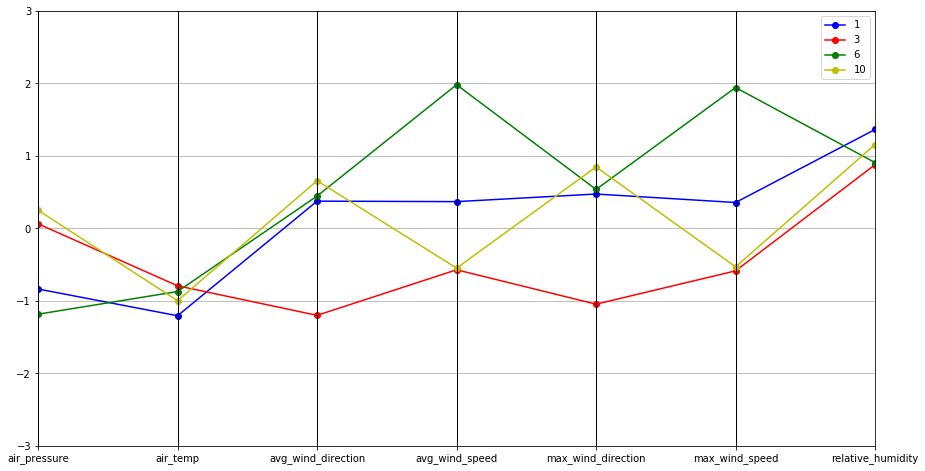

In [107]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])  #cool days